# </font> <font color = #4854E8> LINEAR REGRESSION </font>

Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable.

<b>Data Information: </b>

   <b>Salary Dataset:</b> This dataset is have 30 numbers of observation and 2 numbers ofattributes which contains the  information of Salary with with respect to Years of Experice <br>

   <b> Attribute Information </b> <br>
    `Years of Experience:` Numercal (1.1 - 10.5)<br>
    `Salary:` Numercal (39343 - 121872)<br>

<b> Importing Libraries </b>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b> Importing the dataset </b>

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<b> Exploratory Data Analysis </b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
print(f'The number of columns : {df.shape[1]}')
print(f'The number of rows    : {df.shape[0]}')

The number of columns : 2
The number of rows    : 30


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

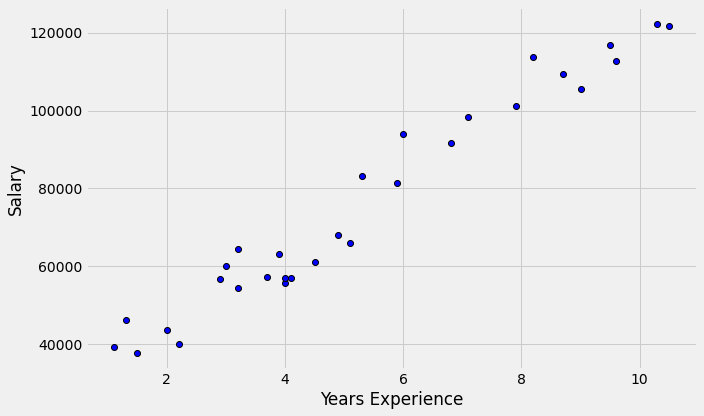

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.scatter(df['YearsExperience'],df['Salary'], color='blue', edgecolor='black', linewidth=1)
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

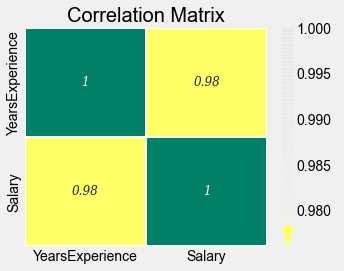

In [9]:
plt.figure(figsize=(5,4))

annot_kws = {'fontsize':12,
             'fontstyle':'italic',
             'fontfamily':'serif',
             'alpha':1}

cbar_kws = {'shrink':1,
            'extend':'min',
            'extendfrac':0.1,
            'drawedges':True}

sns.heatmap(df.corr(), annot=True, cmap='summer_r', linewidth=0.2, cbar_kws = cbar_kws, annot_kws=annot_kws)
plt.title('Correlation Matrix', fontsize = 20)
sns.set(font_scale = 1.2)

plt.tight_layout()
plt.show()

<b> Data Preprocessing </b>

In [10]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [13]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

Split the data into train and test

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test  :", x_test.shape)
print("y_test  :", y_test.shape)

x_train : (24, 1)
y_train : (24,)
x_test  : (6, 1)
y_test  : (6,)


<b> Buliding Linear Regression </b>

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()

In [18]:
regressor.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(x_test)

In [20]:
y_pred

array([62719.2794519 , 81534.80943366, 64600.83245008, 82475.58593275,
       53311.51446102, 74008.59744096])

<b> Evaluate the Result </b>

In this part, we evaluate the Linear Regression Model. And for evaluation we will use three metrics. <br>

`R Square`: R Square measures how much variability in dependent variable can be explained by the model. <br>

`Mean Square Error`: MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. <br>

`Mean Absolute Error`: Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r_square = r2_score(y_pred,y_test)
print(f'r square error : {r_square}')
mean_square = mean_squared_error(y_pred,y_test)
print(f'mean square error : {mean_square}')
mean_absolute = mean_absolute_error(y_pred,y_test)
print(f'mean absolute error : {mean_absolute}')

r square error : 0.6045467427141156
mean square error : 43837503.315711506
mean absolute error : 5160.809913170898


<b> Visulalizing the test result </b>

<function matplotlib.pyplot.show(close=None, block=None)>

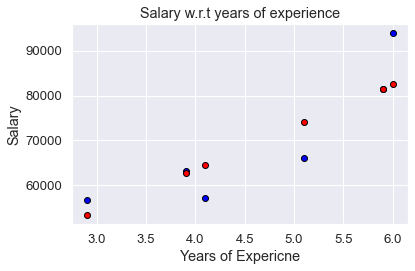

In [22]:
plt.scatter(x_test, y_test, color = 'blue', edgecolor='black', linewidth=1)
plt.scatter(x_test, y_pred, color = 'red', edgecolor='black', linewidth=1)

plt.title('Salary w.r.t years of experience')
plt.xlabel('Years of Expericne')
plt.ylabel('Salary')


plt.tight_layout()
plt.show

<b> Making a Single Prediction </b>

<font color = blue> What will be the Salary if Years of Experience is 21

In [23]:
col = ['Years of Experience', 'Salary']
pd.DataFrame([[21, '?']], columns = col)

,Years of Experience,Salary
0,21,?


In [24]:
regressor.predict([[21]])

C:\Users\heman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([223592.06079596])